1. Install Necessary Libraries

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn


You should consider upgrading via the 'c:\users\sreeja\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


1. Import Libraries

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Configure visualizations
sns.set(style="whitegrid")


2. Load Dataset

In [3]:

# Replace 'spam.csv' with your dataset file path
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv', sep='\t', names=['label', 'message'])

# Preview the first few rows of the dataset
print("Dataset preview:")
print(data.head())

# Check the dataset size
print("\nDataset contains {} rows and {} columns.".format(data.shape[0], data.shape[1]))


Dataset preview:
  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

Dataset contains 5572 rows and 2 columns.


3. Data Preprocessing


Missing values in dataset:
label      0
message    0
dtype: int64

Label distribution:
0    4516
1     653
Name: label, dtype: int64


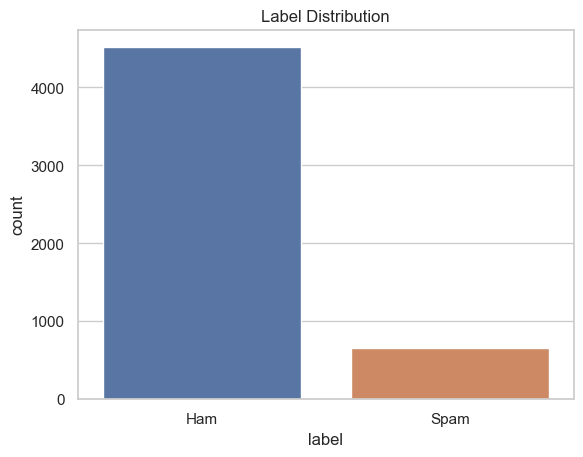

In [4]:
# Convert labels to binary format (spam = 1, ham = 0)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

# Check for missing values
print("\nMissing values in dataset:")
print(data.isnull().sum())

# Remove duplicates
data = data.drop_duplicates()

# Show the distribution of labels
print("\nLabel distribution:")
print(data['label'].value_counts())

# Visualize the label distribution
sns.countplot(data=data, x='label')
plt.xticks([0, 1], ['Ham', 'Spam'])
plt.title('Label Distribution')
plt.show()


4. Text Preprocessing and Vectorization

In [5]:
# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Apply TF-IDF to the 'message' column
X = tfidf.fit_transform(data['message'])

# Extract the target variable (label)
y = data['label']

# Check the shape of the feature matrix
print("\nFeature matrix shape (X):", X.shape)



Feature matrix shape (X): (5169, 5000)


5. Split Dataset

In [6]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the size of training and testing sets
print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])


Training set size: 4135
Testing set size: 1034


6. Train the Model

In [7]:
# Initialize the Naïve Bayes classifier
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


7. Test and Evaluate the Model


Model Accuracy: 97.97%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       894
           1       1.00      0.85      0.92       140

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.95      1034
weighted avg       0.98      0.98      0.98      1034



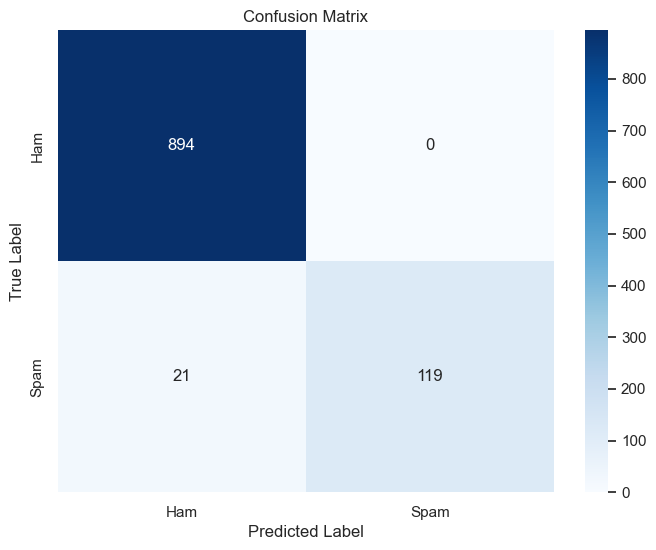

In [8]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
